http://web.eecs.umich.edu/~mihalcea/downloads.html

In [27]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import semcor
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt
import random
import string
from pprint import pprint
from nltk.wsd import lesk

### Funzioni usate dall'algoritmo di Lesk

In [28]:
def get_context(sentence):
    # bag of words approach
    sentence.lower()
    tokens = word_tokenize(sentence) 
    tokens = list(filter(lambda token: token not in string.punctuation, tokens))
    wnl = nltk.WordNetLemmatizer()
    return [wnl.lemmatize(token.lower()) for token in tokens if token not in stopwords.words('english')] 

def get_gloss_examples(sense):
    gloss = get_context(sense.definition())
    examples = get_context(' '.join((sense).examples()))
    return gloss + examples

def get_overlap(list_1, list_2):
    return [value for value in list_1 if value in list_2]

### Algoritmo di Lesk

In [29]:
def my_lesk(word, sentence):
    if len(wn.synsets(word)) == 0:
        return None
    best_sense = wn.synsets(word)[0]
    max_overlap = 0
    context = get_context(sentence)
    signature = None
    overlap = None
    for sense in wn.synsets(word):
        signature = get_gloss_examples(sense)
        overlap = get_overlap(context, signature)
        if len(overlap) > max_overlap:
            max_overlap = len(overlap)
            best_sense = sense
    return best_sense

In [30]:
sentence = "i want to go to the bank to deposit my money"
sentence1 = "the bank of the river"

print(my_lesk('bank', sentence))
print(lesk(sentence, 'bank'), '\n')
print(my_lesk('bank', sentence1))
print(lesk(sentence1, 'bank'))

Synset('depository_financial_institution.n.01')
Synset('savings_bank.n.02') 

Synset('bank.n.01')
Synset('savings_bank.n.02')


### Funzioni utili per l'esecuzione dell'algoritmo di Lesk su 50 frasi scelte randomicamente da SemCor

In [31]:
def get_rand_elems(tagged_sentences):
    phrases = []
    extracted = []
    while len(phrases) < 50:
        rand = random.randint(0, len(tagged_sentences))
        if '\'NN\'' in str(tagged_sentences[rand]) and rand not in extracted and '.n.' in str(tagged_sentences[rand]):
            phrases.append(tagged_sentences[rand])
            extracted.append(rand)
    return phrases, extracted

def get_nouns(list_of_sentences):
    nouns = []
    for sentence in list_of_sentences:
        for word in sentence:
            if word.pos()[0][1] == 'NN' and '.n.' in str(word):
                nouns.append([word.leaves(), word.label()]) # coppia (parola, synset corretto)
                break
    return nouns    
     
def list_to_string(s):
    str1 = ''
    for ele in s:
        str1 += ele + ' '  
    return str1

### Esecuzione

Frasi annotatate con synset su SemCor

In [32]:
sentences = semcor.sents()
tagged_sentences = semcor.tagged_sents(tag="both")

esecuzione dell'algoritmo di Lesk su ogni sostantivo estratto

In [33]:
def execution(tagged_sentences, iterations):
    current_ex = 0
    accuracies = [] # salvo l'accuratezza per ogni iterazione
    while current_ex < iterations:
        random_sentences, rand = get_rand_elems(tagged_sentences)
        nouns = get_nouns(random_sentences)
        correct = 0
        for i in range(len(nouns)):
            actual_lesk = my_lesk(nouns[i][0][0], list_to_string(sentences[rand[i]]))
            if actual_lesk is not None:
                if str(actual_lesk).split('\'')[1] in str(nouns[i][1]):
                    correct += 1
                    #print(actual_lesk)

        accuracies.append(correct/len(nouns))
        current_ex += 1
    return accuracies

### Andamento dell'accuracy su 10 e 20 esecuzioni

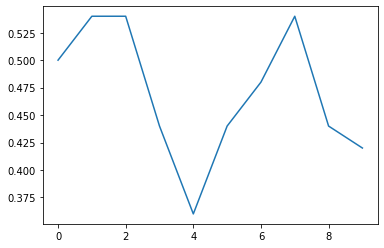

AVG ACCURACY: 0.47

MAX ACCURACY: 0.54

MIN ACCURACY: 0.36

[0.5, 0.54, 0.54, 0.44, 0.36, 0.44, 0.48, 0.54, 0.44, 0.42]


In [34]:
accuracies_10 = execution(tagged_sentences, 10)
plt.plot(accuracies_10)
plt.show()
print(f"AVG ACCURACY: {round(sum(accuracies_10)/len(accuracies_10),2)}\n")
print(f"MAX ACCURACY: {round(max(accuracies_10),2)}\n")
print(f"MIN ACCURACY: {round(min(accuracies_10), 2)}\n")
print(accuracies_10)

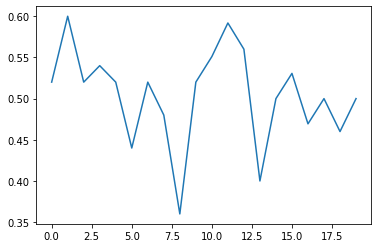

AVG ACCURACY: 0.5
MAX ACCURACY: 0.6
MIN ACCURACY: 0.36
[0.52, 0.6, 0.52, 0.54, 0.52, 0.44, 0.52, 0.48, 0.36, 0.52, 0.5510204081632653, 0.5918367346938775, 0.56, 0.4, 0.5, 0.5306122448979592, 0.46938775510204084, 0.5, 0.46, 0.5]


In [36]:
accuracies_20 = execution(tagged_sentences, 20)
plt.plot(accuracies_20)
plt.show()
print(f"AVG ACCURACY: {round(sum(accuracies_20)/len(accuracies_20), 2)}")
print(f"MAX ACCURACY: {round(max(accuracies_20),2)}")
print(f"MIN ACCURACY: {round(min(accuracies_20), 2)}")
print(accuracies_20)